## Inferenz für Standardabweichungen zweier Grundgesamtheiten
----------------------------------------

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import f
from scipy import stats
import scipy.stats
import statsmodels.api as smi


%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


In diesem Abschnitt werden Hypothesentests für die Standardabweichungen zweier Grundgesamtheiten behandelt. Oder anders ausgedrückt, wir erörtern Methoden der Inferenz für die Standardabweichungen einer Variablen aus zwei verschiedenen Grundgesamtheiten. Diese Methoden beruhen auf der <a href="https://en.wikipedia.org/wiki/F-distribution">$F$-Verteilung</a>, benannt zu Ehren von <a href="https://en.wikipedia.org/wiki/Ronald_Fisher">Sir Ronald Aylmer Fisher</a>.

Die $F$-Verteilung ist eine rechtsschiefe Wahrscheinlichkeitsdichteverteilung mit zwei Formparametern, $v_1$ und $v_2$, den Freiheitsgraden für den Zähler ($v_1$) und den Freiheitsgraden für den Nenner ($v_2$).

$$df = (v_1,v_2)$$

Wie bei jeder anderen Dichtekurve entspricht die Fläche unter der Kurve der $F$-Verteilung den Wahrscheinlichkeiten. Die Fläche unter der Kurve und damit die Wahrscheinlichkeit für ein gegebenes Intervall und einen gegebenen $df$-Wert wird mittels Software berechnet. Alternativ kann man sie auch in einer <a href="https://www.itl.nist.gov/div898/handbook/eda/section3/eda3673.htm">Tabelle</a> nachschlagen. In diesen Tabellen werden im Allgemeinen die Freiheitsgrade für den Zähler ($v_1$) am oberen Rand angezeigt, während die Freiheitsgrade für den Nenner ($v2$) in den äußeren Spalten auf der linken Seite angezeigt werden.

Um einen Hypothesentest für zwei Grundgesamtheitsstandardabweichungen durchzuführen, wird der Wert berechnet, der einer bestimmten Fläche unter einer $F$-Kurve entspricht, berechnet.

Für gegebenes $\alpha$,wobei $\alpha$ einer Wahrscheinlichkeit zwischen $0$ und $1$ entspricht, bezeichnet $F_\alpha$ den Wert, der eine Fläche $\alpha$ zu seiner Rechten unter einer $F$-Kurve hat.

![Alt-Text](78_Fvert.png)

In der obigen Abbildung ergibt $F_{0,05}$ für $df=(9,14)$ den Wert $\approx 2,6458$.

Eine interessante Eigenschaft von $F$-Kurven ist die **reziproke Charakteristik**. Sie besagt, dass für eine $F$-Kurve mit $df=(v_1,v_2)$ der $F$-Wert mit der Fläche $\alpha$ auf der linken Seite gleich dem Kehrwert des $F$-Wertes mit der Fläche $\alpha$ auf der rechten Seite für eine $F$-Kurve mit $df=(v_2,v_1)$ ist ({cite:p}`fahrmeirstatistik` s.282). Übertragen auf das obige Beispiel, bei dem $F_{0,05}$ für $df=(9,14) \approx 2,6458$ beträgt, bedeutet dies, dass $F_{0,95}$ für $df=(14,9) \ ; \  \frac{1}{2,6458}=0,378$ beträgt.

![Alt-Text](78_Fvert2.png)

### Intervall-Schätzung von $\sigma_1-\sigma_2$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\sigma$ beträgt

$$\frac{1}{\sqrt{F_{\alpha /2}}} \times \frac{s_1}{s_2} \le \sigma \le \frac{1}{\sqrt{F_{1-\alpha /2}}} \times \frac{s_1}{s_2}\text{,}$$

wobei $s_1$ und $s_2$ die Standardabweichungen der Stichprobe sind.

### $F$-Test für zwei Standardabweichungen

Das Hypothesentestverfahren für die Standardabweichung wird als F-Test für zwei Standardabweichungen bezeichnet. Der Hypothesentest für zwei Standardabweichungen der Grundgesamtheit folgt demselben schrittweisen Verfahren wie andere Hypothesentests.

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn }p \le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}
$$

Die Teststatistik für einen Hypothesentest für eine normalverteilte Variable und für unabhängige Stichproben der Größen $n_1$ und $n_2$ ist gegeben durch

$$F = \frac{s_1^2/\sigma_1^2}{s_2^2/\sigma_2^2}\text{,}$$

mit $df=(n_1-1,n_2-1)$.

Wenn $H_0: \sigma_1 = \sigma_2$ wahr ist, dann vereinfacht sich die Gleichung zu

$$F = \frac{s_1^2}{s_2^2}$$

### $F$-Test für zwei Standardabweichungen : Ein Beispiel

Um einige praktische Erfahrungen zu sammeln, wenden wir den **$F$-Test für zwei Standardabweichungen** in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [4]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary.*

Um den **$F$-Test für zwei Standardabweichungen** zu zeigen, untersuchen wir die Streuung der Körpergröße in cm der Studentinnen und vergleichen sie mit der Streuung der Körpergröße aller Studenten (unserer Grundgesamtheit). **Wir wollen testen, ob sich die Standardabweichung der Körpergröße der weiblichen Studenten ($\sigma_1$) von der Standardabweichung der Körpergröße der männlichen Studenten ($\sigma_2$) unterscheidet**.

### Vorbereitung der Daten


-    Wir unterteilen den Datensatz anhand der Variable `gender`.
-    Dann nehmen wir $25$ weibliche und $25$ männliche Studenten in die Stichprobe auf.
-    Dann berechnen wir die Standardabweichungen der interessierenden Variable (Körpergröße in cm) für beide Stichproben und weisen ihnen die Variablen `std_female` und `std_male` zu.

In [17]:
# Unterteile Datensatz nach Variable `gender`
male = students.loc[students['gender']=='Male']
female = students.loc[students['gender']=='Female']

# Entnehme Probe von jeweils 25 Studenten
n = 25
male_sample = male['height'].sample(n=25, random_state=1)
female_sample = female['height'].sample(n=25, random_state=1)
std_female = np.std(female_sample,ddof=1)
std_female

7.009041779492163

In [16]:
std_male = np.std(male_sample,ddof=1)
std_male

8.203251387915241

Außerdem überprüfen wir die Normalverteilungsannahme, indem wir ein <a href="https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot">Q-Q-Diagramm</a> erstellen. In Python können wir die Funktion `qqplot()` verwenden, um Q-Q-Plots zu erstellen.

Text(0, 0.5, 'Stichproben Quantillen')

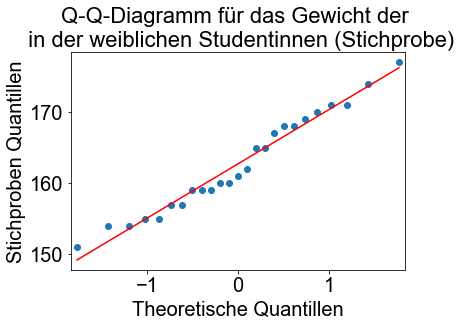

In [8]:
# Erzeuge Q-Q Plot
qqp = smi.qqplot(female_sample, line = "r")
ax1 = qqp.gca()
ax1.set_title('Q-Q-Diagramm für das Gewicht der \n in der weiblichen Studentinnen (Stichprobe)')
ax1.set_xlabel('Theoretische Quantillen')
ax1.set_ylabel('Stichproben Quantillen')

Text(0, 0.5, 'Stichproben Quantillen')

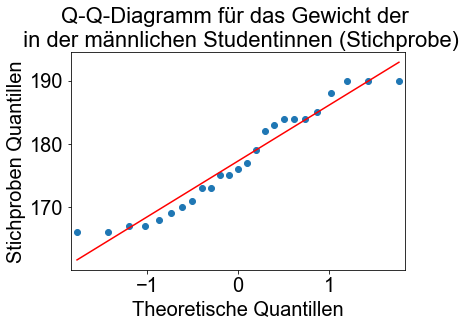

In [10]:
# Erzeuge Q-Q Plot
qqp2 = smi.qqplot(male_sample, line = "r")
ax1 = qqp2.gca()
ax1.set_title('Q-Q-Diagramm für das Gewicht der \n in der männlichen Studentinnen (Stichprobe)')
ax1.set_xlabel('Theoretische Quantillen')
ax1.set_ylabel('Stichproben Quantillen')

Wir sehen, dass die Daten ungefähr auf einer Geraden liegen. Auf der Grundlage des grafischen Auswertungsansatzes kommen wir zu dem Schluss, dass die interessierende Variable ungefähr normalverteilt ist.

### Überprüfung der Hypothesen

Zur Durchführung des **$F$-Tests für zwei Standardabweichungen** folgen wir dem Verfahren der schrittweisen Durchführung von Hypothesentests.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass die Standardabweichung der Körpergröße der weiblichen Studenten ($\sigma_1$) gleich der Standardabweichung der Körpergröße der männlichen Studenten ($\sigma_2$) ist.

$$H_0: \quad \sigma_1 = \sigma_2$$

**Alternative Hypothese**

$$H_A: \quad \sigma_1 \ne \sigma_2$$

Diese Formulierung führt zu einem zweiseitigen Hypothesentest.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,05$$

In [11]:
alpha = 0.05

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die Gleichung für die Teststatistik von oben:

$$F = \frac{s_1^2}{s_2^2}$$

In [12]:
# Berechne die Teststatistik
Ftest = std_female**2/std_male**2
Ftest

0.7300376461264115

Der numerische Wert der Teststatistik beträgt $\approx 0,73$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `f.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet.

$$df = (n_1 - 1, n_2 - 1)$$

In [13]:
# Berechne df
df1 = len(female_sample)-1
df2 = len(male_sample)-1

# Berechne p-Wert
p_upper = 1-f.cdf(Ftest, dfn = df1, dfd = df2)
p_lower = f.cdf(Ftest, dfn = df1, dfd = df2)

if (p_upper*2 > 1):
    p = p_lower*2
else:
    p = p_upper*2
p

0.4465246946119613

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [14]:
p <= alpha

False

Der $p$-Wert ist größer als das angegebene Signifikanzniveau von $0,05$; wir verwerfen $H_0$ nicht. Die Testergebnisse sind auf dem $5 \%$-Niveau statistisch signifikant und liefern keinen ausreichenden Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=0,44652469$. Bei einem Signifikanzniveau von $5 \%$ liefern die Daten keine ausreichenden Beweise für die Schlussfolgerung, dass die Standardabweichungen der Körpergröße von weiblichen und männlichen Studenten unterschiedlich sind.

### Hypothesentests in Python

Wir haben gerade einen $F$-Test für zwei Standardabweichungen in Python manuell durchgeführt. OK, wir haben eine Menge gelernt, aber jetzt nutzen wir die Mittel von Python, um das gleiche Ergebnis wie oben mit nur einer Zeile Code zu erhalten!

Um einen $F$-Test für zwei Standardabweichungen  in Python durchzuführen, verwenden wir unsere Funktion `simple_x2_test()` und verändern sie geringfügig. Wir geben zwei Vektoren als Dateneingabe an: `female_sample` und `male_sample`. Das Argument `alternative` muss nicht angegeben werden, da `alternative = 'two-sided'` die Vorgabe ist.

In [26]:
def simple_f_test(x, y, dfn, dfd, alpha, method = 'two-sided'):
    df1 = len(female_sample)-1
    df2 = len(male_sample)-1
    std_male = np.std(male_sample,ddof=1)
    std_female = np.std(female_sample,ddof=1)
    # Berechne Teststatistik
    Ftest = std_female**2/std_male**2
    
    # linksseitiger Test
    if (method=='left'):
        p = scipy.stats.f.cdf(x = Ftest, dfn = df1, dfd = df2)
    # rechtsseitiger Test   
    elif method=='right':
        p = 1-scipy.stats.f.cdf(x = Ftest, dfn = df1, dfd = df2)
         
          
    # beidseitiger Test (default)
    else:
        p_upper = 1-f.cdf(Ftest, dfn = df1, dfd = df2)
        p_lower = f.cdf(Ftest, dfn = df1, dfd = df2)

    if (p_upper*2 > 1):
        p = p_lower*2
    else:
        p = p_upper*2
    #evaluiere p < alpha
    if p < alpha:
          reject = True
    else:
          reject = False

            
    # print out summary and evaluation
    print('Significance level:',alpha)
    print('Degrees of freedom:',df1,df2)
    print('Test statistic:',round(Ftest,4))
    print('p-value:',p)
    print('Reject H0:',reject)

In [25]:
simple_f_test(female_sample, male_sample,df1,df2, alpha=alpha)

Significance level: 0.05
Degrees of freedom: 24 24
Test statistic: 0.73
p-value: 0.4465246946119613
Reject H0: False


Es hat gut funktioniert! Vergleichen Sie die Ausgabe der Funktion `simple_f_test()` mit unserem Ergebnis von oben. Auch hier können wir zu dem Schluss kommen, dass die Daten bei einem Signifikanzniveau von $5 \%$ keine ausreichenden Beweise dafür liefern, dass die Standardabweichungen der Körpergröße von weiblichen und männlichen Studenten unterschiedlich sind.